Homework 3 (100 Points)

In this homework, we will use the Diabetes dataset and Cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.)


Problem 1 (20 points)

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Draw your training results, including loss and classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall, FI score. At the end, plot the confusion matrix representing your binary classifier.

In [ ]:
import numpy as np
import pandas as pd

#Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/diabetes.csv'
df = pd.read_csv(url)
#df.head()

Pre-Processing.

In [ ]:
# In our Data set we’ll consider:
# Independent: Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age
# Dependent: Outcome

x = df.iloc[:,:8].values
y = df.iloc[:,8].values

#Now we’ll do feature scaling to scale our data between 0 and 1 to get better accuracy.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

#Now we’ll split our Data set into Training Data and Test Data. Training data will be used to train our
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to split our data. We’ll import  train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

Logistic Regression.

In [ ]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

LogisticRegression. Confusion Matrix.

In [ ]:
#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)

Building Model and getting accuracy.

In [ ]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print("Training results: loss, and classification accuracy over iterations")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

#Full Report
print("Full Report:")
print(metrics.classification_report(y_test, y_pred))
print()
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Training results: loss, and classification accuracy over iterations
Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706

Full Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154


Confusion Matrix:
[[98  9]
 [18 29]]


Plotting Results

Text(0.5, 427.9555555555555, 'Predicted label')

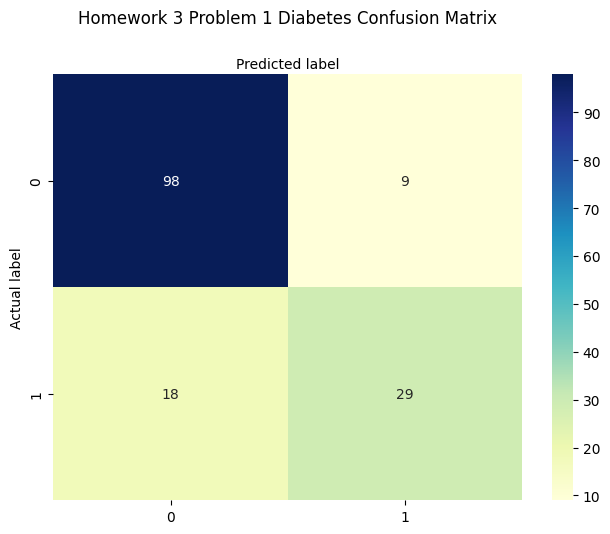

In [ ]:
class_names = ["Negative Outcome (0)", "Positive Outcome (1)"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap ="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Homework 3 Problem 1 Diabetes Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')